In [1]:
from astropy import units as u
from plasmapy.formulary.parameters import plasma_frequency, Debye_length

import directsolver

from functools import partial
from importlib import reload

reload(directsolver)
import util
reload(util)
from util.MTSI  import eps_MTSI
from util.iaw import eps_IAW, analytic_IAW, analytic_IAW_simple
from directsolver import solvekys
from scipy import optimize

import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import m_e, m_p
me = m_e.value
mi = 131*m_p.value

In [2]:
Te = 10*u.eV
plasmaDensity=1e16 *u.m**(-3)

In [3]:
from util.parameters import PlasmaParameters

In [4]:
pp = PlasmaParameters(plasmaDensity=plasmaDensity, electronTemperature=Te)

In [5]:
pp.Debye_length

<Quantity 0.00023508 m>

In [6]:
pp.ionPlasmaFrequency

<Quantity 11531653.95287732 rad / s>

In [7]:
pp.ionPlasmaFrequency/(2*np.pi*u.rad)

<Quantity 1835319.72862562 1 / s>

In [8]:
pp.BohmSpeed

<Quantity 2710.88297111 m / s>

In [9]:
pp.driftSpeed

<Quantity 50000000. m / s>

In [10]:
# Compute
kx = 0.0
kz = 0.0
prt=PlasmaParameters(plasmaDensity=1e17/u.m**3,
                     electronTemperature=20*u.eV,
                     magneticField=0.02*u.T,
                     electricField=4e4*u.V/u.m,
                     ionTemperature=0.01*u.eV)



plasmaEps = partial(eps_IAW, prt=prt)

wrfunct = lambda k: analytic_IAW(k, ti=prt.ionTemperature/ prt.electronTemperature)

kysref, xsref = solvekys(plasmaEps, kx=kx, kz=kz, kymin=6, kymax=0.1,
                         parall=False, wrfunct=wrfunct, Nkys=30)


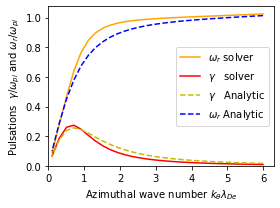

In [11]:

# plot
fig = plt.figure(figsize=(4,3))
plt.plot(kysref, xsref[:,0], "orange", label="$\omega_r$ solver")
plt.plot(kysref, xsref[:,1], "red", label="$\gamma$   solver")

plt.plot(kysref, prt.driftSpeed/prt.BohmSpeed* np.sqrt(me/mi)*np.sqrt(np.pi/8)*kysref/(1 + kysref**2)**(3/2), "y--", label="$\gamma$   Analytic")
plt.plot(kysref, analytic_IAW(kysref, ti=prt.ionTemperature/ prt.electronTemperature), "b--", label="$\omega_r$ Analytic")


plt.legend()
plt.xlabel("Azimuthal wave number $k_{\\theta} \\lambda_{De}$")
plt.ylabel("Pulsations  $\\gamma/\\omega_{pi}$ and $ \\omega_r/\\omega_{pi} $")
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()

### Conlcusion

The solver reproduce almost the analytique dispertion relation for the Ion Accoustic wave.
The origine of the discrepency is yet to me found

#  Modified Two Streams Instability

The dispertion relation of the Modified Two Streams Instability (MTSI) is rather simple, as no Fedevaa function is used.

However, there is no Analytic solution, yet.

In [25]:
# Compute
kx = 0.0
kz = 0.005
prt=PlasmaParameters(plasmaDensity=1e17/u.m**3,
                     electronTemperature=1*u.eV,
                     magneticField=0.02*u.T,
                     electricField=4e4*u.V/u.m,
                     ionTemperature=0.00001*u.eV)



plasmaEps = partial(eps_MTSI, prt=prt)

# we still use the IAW as a first guess
wrfunct = lambda k: analytic_IAW(k, ti=prt.ionTemperature/ prt.electronTemperature)

kysref, xsref = solvekys(plasmaEps, kx=kx, kz=kz, kymin=1, kymax=0.01,
                         parall=False, Nkys=200)


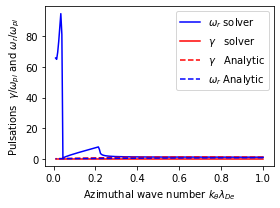

In [26]:

# plot
fig = plt.figure(figsize=(4,3))
plt.plot(kysref, xsref[:,0], "b", label="$\omega_r$ solver")
plt.plot(kysref, xsref[:,1], "red", label="$\gamma$   solver")

plt.plot(kysref, prt.driftSpeed/prt.BohmSpeed* np.sqrt(me/mi)*np.sqrt(np.pi/8)*kysref/(1 + kysref**2)**(3/2), "r--", label="$\gamma$ IAW  Analytic")
plt.plot(kysref, analytic_IAW(kysref, ti=prt.ionTemperature/ prt.electronTemperature), "b--", label="$\omega_r$ IAW Analytic")


plt.legend()
plt.xlabel("Azimuthal wave number $k_{\\theta} \\lambda_{De}$")
plt.ylabel("Pulsations  $\\gamma/\\omega_{pi}$ and $ \\omega_r/\\omega_{pi} $")
#plt.xlim(left=0)
#plt.ylim(bottom=0)

plt.tight_layout()